In [36]:
#Import der Bibliotheken

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Prüfen auf Vorhandensein

print(np.__version__)
print(pd.__version__)
print(plt.__version__)
print(sns.__version__)

2.1.3
2.2.3
3.10.0
0.13.2


In [3]:
# Laden der Daten

df = pd.read_csv("NetFlix.csv")

# Anzeigen der Struktur 

print(df.shape)
print()
print(df.columns)
print()
print(df.dtypes)
print()
print(df.info())

(7787, 12)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int

In [4]:
# Vorschau auf die Daten

print(df.head(5))
print()
print(df.tail(5))
print()
print(df.sample(5))

  show_id     type                                      title        director  \
0      s1  TV Show                                         3%             NaN   
1     s10    Movie                                       1920    Vikram Bhatt   
2    s100    Movie                                 3 Heroines  Iman Brotoseno   
3   s1000    Movie  Blue Mountain State: The Rise of Thadland    Lev L. Spiro   
4   s1001  TV Show                             Blue Planet II             NaN   

                                                cast         country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil   
1  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...           India   
2  Reza Rahadian, Bunga Citra Lestari, Tara Basro...       Indonesia   
3  Alan Ritchson, Darin Brooks, James Cade, Rob R...   United States   
4                                 David Attenborough  United Kingdom   

  date_added  release_year rating  duration  \
0  14-Aug-20          2020  TV-MA

In [5]:
# Fehlende Werte analysieren

print(df.isna().sum())
print()
print(df.isna().mean())


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
genres          0.000000
description     0.000000
dtype: float64


In [6]:
# Anzeigen von eindeutigen Werten je Spalte mit dem Datentyp Objekt

df.select_dtypes(include="object").nunique()


show_id        7787
type              2
title          7787
director       4049
cast           6831
country         681
date_added     1565
rating           14
genres          492
description    7769
dtype: int64

In [7]:
# Auf Duplikate prüfen

df.duplicated().sum()

np.int64(0)

In [8]:
# Schlüssel auf Duplikate prüfen

df['show_id'].is_unique

True

In [9]:
# statistische Werte anzeigen

# Alle
df.describe(include="all")

df["duration"].describe()

count    7787.000000
mean       69.122769
std        50.950743
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration, dtype: float64

# Q1) For 'House of Cards', what is the Show Id and Who is the Director of this show?

In [13]:
# Filtern nach show_id und director

house_of_cards_id = df.loc[df["title"] == "House of Cards", "show_id"].iloc[0]

house_of_cards_director = df.loc[df["title"] == "House of Cards", "director"].iloc[0]

print(f' Die show_id von House of Cards ist {house_of_cards_id}. Der Direktor ist nicht angegeben')

 Die show_id von House of Cards ist s2833. Der Direktor ist nicht angegeben


Q. 2) In which year the highest number of the TV Shows & Movies were released?

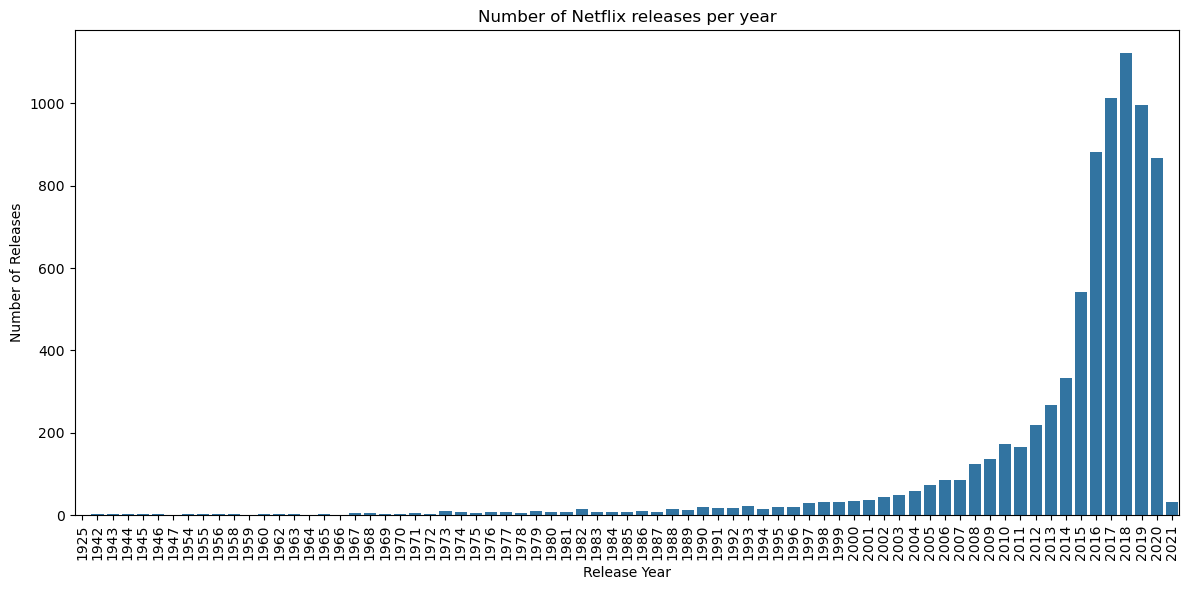

Die Veröffentlichungen auf Netflix haben in den 2010er Jahren stark zu genommen, mit einem Maximum in 2018


In [41]:
# Zählen der Releases pro Jahr/Typ

release_counts = (
    df.groupby("release_year")
      .size()
      .reset_index(name="count")
      .sort_values("release_year")
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=release_counts,
    x="release_year",
    y="count"
)

plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.title("Number of Netflix releases per year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f'Die Veröffentlichungen auf Netflix haben in den 2010er Jahren stark zu genommen, mit einem Maximum in 2018')

Q. 3) How many Movies & TV Shows are in the dataset?

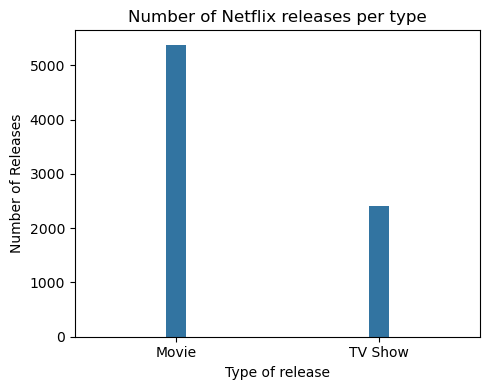

Es wurden 5377 Filme und 2410 Serien veröffentlicht


In [66]:
type_counts = df["type"].value_counts()

movies_total = type_counts["Movie"]
tvshows_total = type_counts["TV Show"]

plt.figure(figsize=(5, 4))
sns.barplot(
    data=type_counts,
    width=0.1
)

plt.xlabel("Type of release")
plt.ylabel("Number of Releases")
plt.title("Number of Netflix releases per type")
plt.tight_layout()
plt.show()

print(f"Es wurden {movies_total} Filme und {tvshows_total} Serien veröffentlicht")

Q. 4) Show all the Movies that were released in year 2000.


In [72]:
movies_2000 = df[
    (df["type"] == "Movie") &
    (df["release_year"] == 2000)
]

movies_2000

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
287,s1257,Movie,Center Stage,Nicholas Hytner,"Amanda Schull, Zoe Saldana, Susan May Pratt, P...",United States,1-Jan-20,2000,PG-13,116,Dramas,Vying for a spot in the American Ballet Compan...
294,s1263,Movie,Chal Mere Bhai,David Dhawan,"Sanjay Dutt, Salman Khan, Karisma Kapoor, Dali...",India,31-Dec-19,2000,TV-14,132,"Comedies, International Movies, Romantic Movies","When a secretary saves her tycoon boss's life,..."
314,s1281,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",1-Oct-19,2000,PG-13,98,"Action & Adventure, Comedies","Three beauties use their looks, charm and mart..."
609,s1547,Movie,"Crouching Tiger, Hidden Dragon",Ang Lee,"Chow Yun Fat, Michelle Yeoh, Zhang Ziyi, Chang...","Taiwan, Hong Kong, United States, China",1-Mar-19,2000,PG-13,120,"Action & Adventure, International Movies, Roma...",A young woman in ancient China longs for an ad...
948,s1852,Movie,Dragonheart: A New Beginning,Doug Lefler,"Christopher Masterson, Harry Van Gorkum, Rona ...",United States,1-Jan-20,2000,PG,84,"Action & Adventure, Sci-Fi & Fantasy",This sequel introduces Draco the dragon's offs...
1295,s2164,Movie,Final Destination,James Wong,"Devon Sawa, Ali Larter, Kerr Smith, Kristen Cl...",United States,1-Jan-20,2000,R,98,"Cult Movies, Horror Movies, Thrillers",After narrowly avoiding a fatal plane explosio...
1337,s2201,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,2-Aug-18,2000,TV-14,163,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...
1766,s2589,Movie,Hamara Dil Aapke Paas Hai,Satish Kaushik,"Anil Kapoor, Aishwarya Rai Bachchan, Sonali Be...",India,1-Mar-18,2000,TV-14,158,"Dramas, International Movies, Music & Musicals",Love blooms when kind-hearted Avinash takes in...
2046,s2840,Movie,How the Grinch Stole Christmas,Ron Howard,"Jim Carrey, Taylor Momsen, Jeffrey Tambor, Chr...",United States,1-Jun-17,2000,PG,105,"Children & Family Movies, Comedies",The Grinch decides to rob Whoville of Christma...
2471,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,27-Sep-11,2000,TV-PG,75,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...


Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [78]:
shows_india = df[
    (df["type"] == "TV Show") &
    (df["country"] == "India")
]

shows_india = shows_india[["title","country"]]
shows_india

,title,country
354,Chhota Bheem,India
368,7 (Seven),India
421,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),India
461,Classic Legends,India
517,College Romance,India
...,...,...
7629,Betaal,India
7643,21 Sarfarosh: Saragarhi 1897,India
7655,Bh Se Bhade,India
7656,Bhaag Beanie Bhaag,India


Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix 

In [82]:
# Daten bereinigen und zählen

directors = df["director"].dropna()

# mehrere Directors getrennt zählen

top_10_directors = (
    df["director"]
    .dropna()
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

top_10_directors

director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Jay Chapman            12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
Name: count, dtype: int64